# `label_phases`

Version 2 of PoreSpy included the ability to perform network extractions on images that contain multiple phases, as outlined by [Khan et al](https://doi.org/10.1016/j.compchemeng.2018.12.025).  The `regions_to_network` function includes the ability to label each pore with the phase to which it belongs, but does nothing else.  The `label_phases` function then analyzes the network output by `regions_to_network` to create the labels that can be used within OpenPNM.

In [1]:
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import numpy as np
from edt import edt
import scipy.ndimage as spim

0it [00:00, ?it/s]

0it [00:00, ?it/s]

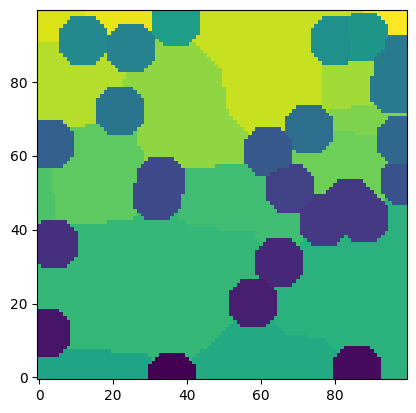

In [3]:
np.random.seed(13)
im = ps.generators.overlapping_spheres([100, 100], r=7, porosity=0.7)
snow = ps.filters.snow_partitioning_n(im=im.astype(int) + 1)
ps.imshow(snow.regions, origin='lower', interpolation='none');

## `network`
The dictionary returned from the `regions_to_network` function must be supplied:

In [6]:
net = ps.networks.regions_to_network(regions=snow.regions, phases=snow.im)

Extracting pore and throat properties:   0%|          | 0/37 [00:00<?, ?it/s]

In [8]:
net = ps.networks.label_phases(network=net)

In [9]:
for item in net.keys():
    print(item)

throat.conns
pore.coords
pore.all
throat.all
pore.region_label
pore.phase
throat.phases
pore.region_volume
pore.equivalent_diameter
pore.local_peak
pore.global_peak
pore.geometric_centroid
throat.global_peak
pore.inscribed_diameter
pore.extended_diameter
throat.inscribed_diameter
throat.total_length
throat.direct_length
throat.perimeter
pore.volume
pore.surface_area
throat.cross_sectional_area
throat.equivalent_diameter
pore.void
throat.void_void
throat.void_solid
pore.solid
throat.solid_void
throat.solid_solid


In the above print-out we can see that several labels have been added to the list, such as `'throat.void_void'` which is ``True`` for all throats which connect a void pore to another void pore, and so forth.

## `alias`
We can override the default names of `'solid'` and `'void'` by providing a `dict` which maps the phase number to our desired name as follows:

In [12]:
net = ps.networks.regions_to_network(regions=snow.regions, phases=snow.im)
net = ps.networks.label_phases(network=net, alias={1: 'void', 2: 'grain'})
for item in net.keys():
    print(item)

Extracting pore and throat properties:   0%|          | 0/37 [00:00<?, ?it/s]

throat.conns
pore.coords
pore.all
throat.all
pore.region_label
pore.phase
throat.phases
pore.region_volume
pore.equivalent_diameter
pore.local_peak
pore.global_peak
pore.geometric_centroid
throat.global_peak
pore.inscribed_diameter
pore.extended_diameter
throat.inscribed_diameter
throat.total_length
throat.direct_length
throat.perimeter
pore.volume
pore.surface_area
throat.cross_sectional_area
throat.equivalent_diameter
pore.void
throat.void_void
throat.void_grain
pore.grain
throat.grain_void
throat.grain_grain


Now we can see that `'solid'` and `'void'` have been replaced by `'void'` and `'grain'`.